# LOAN APPROVAL PREDICTION

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status.
<p>Here, we use data cleaning, EDA, and data visualization to analyze the loan approval insights, and make a presentation.</p>

#### About columns:

* loan_id
* no_of_dependents: Number of Dependents of the Applicant
* education: Education of the Applicant (Graduate/Not Graduate)
* self_employed: Employment Status of the Applicant
* income_annum: Annual Income of the Applicant
* loan_amount: Loan Amount
* loan_term: Loan Term in Years
* cibil_score: Credit Score
* residential_assets_value
* commercial_assets_value
* luxury_assets_value
* bank_asset_value
* loan_status: Loan Approval Status (Approved/Rejected)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loads the dataset as pandas dataframe
loan = pd.read_csv("/Users/shabnanasser/workplace/git/Springboard/Loan_approval_pred/loan_approval_dataset.csv")
loan.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [3]:
#checking the number of rows and columns
loan.shape

(4269, 13)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
loan.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [6]:
#check for null values
loan.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
#checking for duplicates in the data
loan[loan.duplicated(subset=['loan_id'], keep=False)]

Empty DataFrame
Columns: [loan_id,  no_of_dependents,  education,  self_employed,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []

In [8]:
loan['loan_id'].nunique()

4269

In [9]:
loan.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

Except loan_id, all the column names contain a space in front of the text, we need to trim them up to avoid confusions in the future.

In [10]:
loan.columns = loan.columns.str.replace(' ', '')

In [11]:
loan.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [12]:
loanstat_counts = loan['loan_status'].value_counts()
print(loanstat_counts)

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64


From the above data cleaning scans, we confirmed:

* There are a total 4269 rows in this dataset, with 13 columns (features).
* There is no null value and duplicated value in this dataset.
* education, self_employed and loan_status are categorical columns.
* All other columns are numerical.
* There are 2656 data with an approved loan_status, and 1613 rejected.
  


### EDA

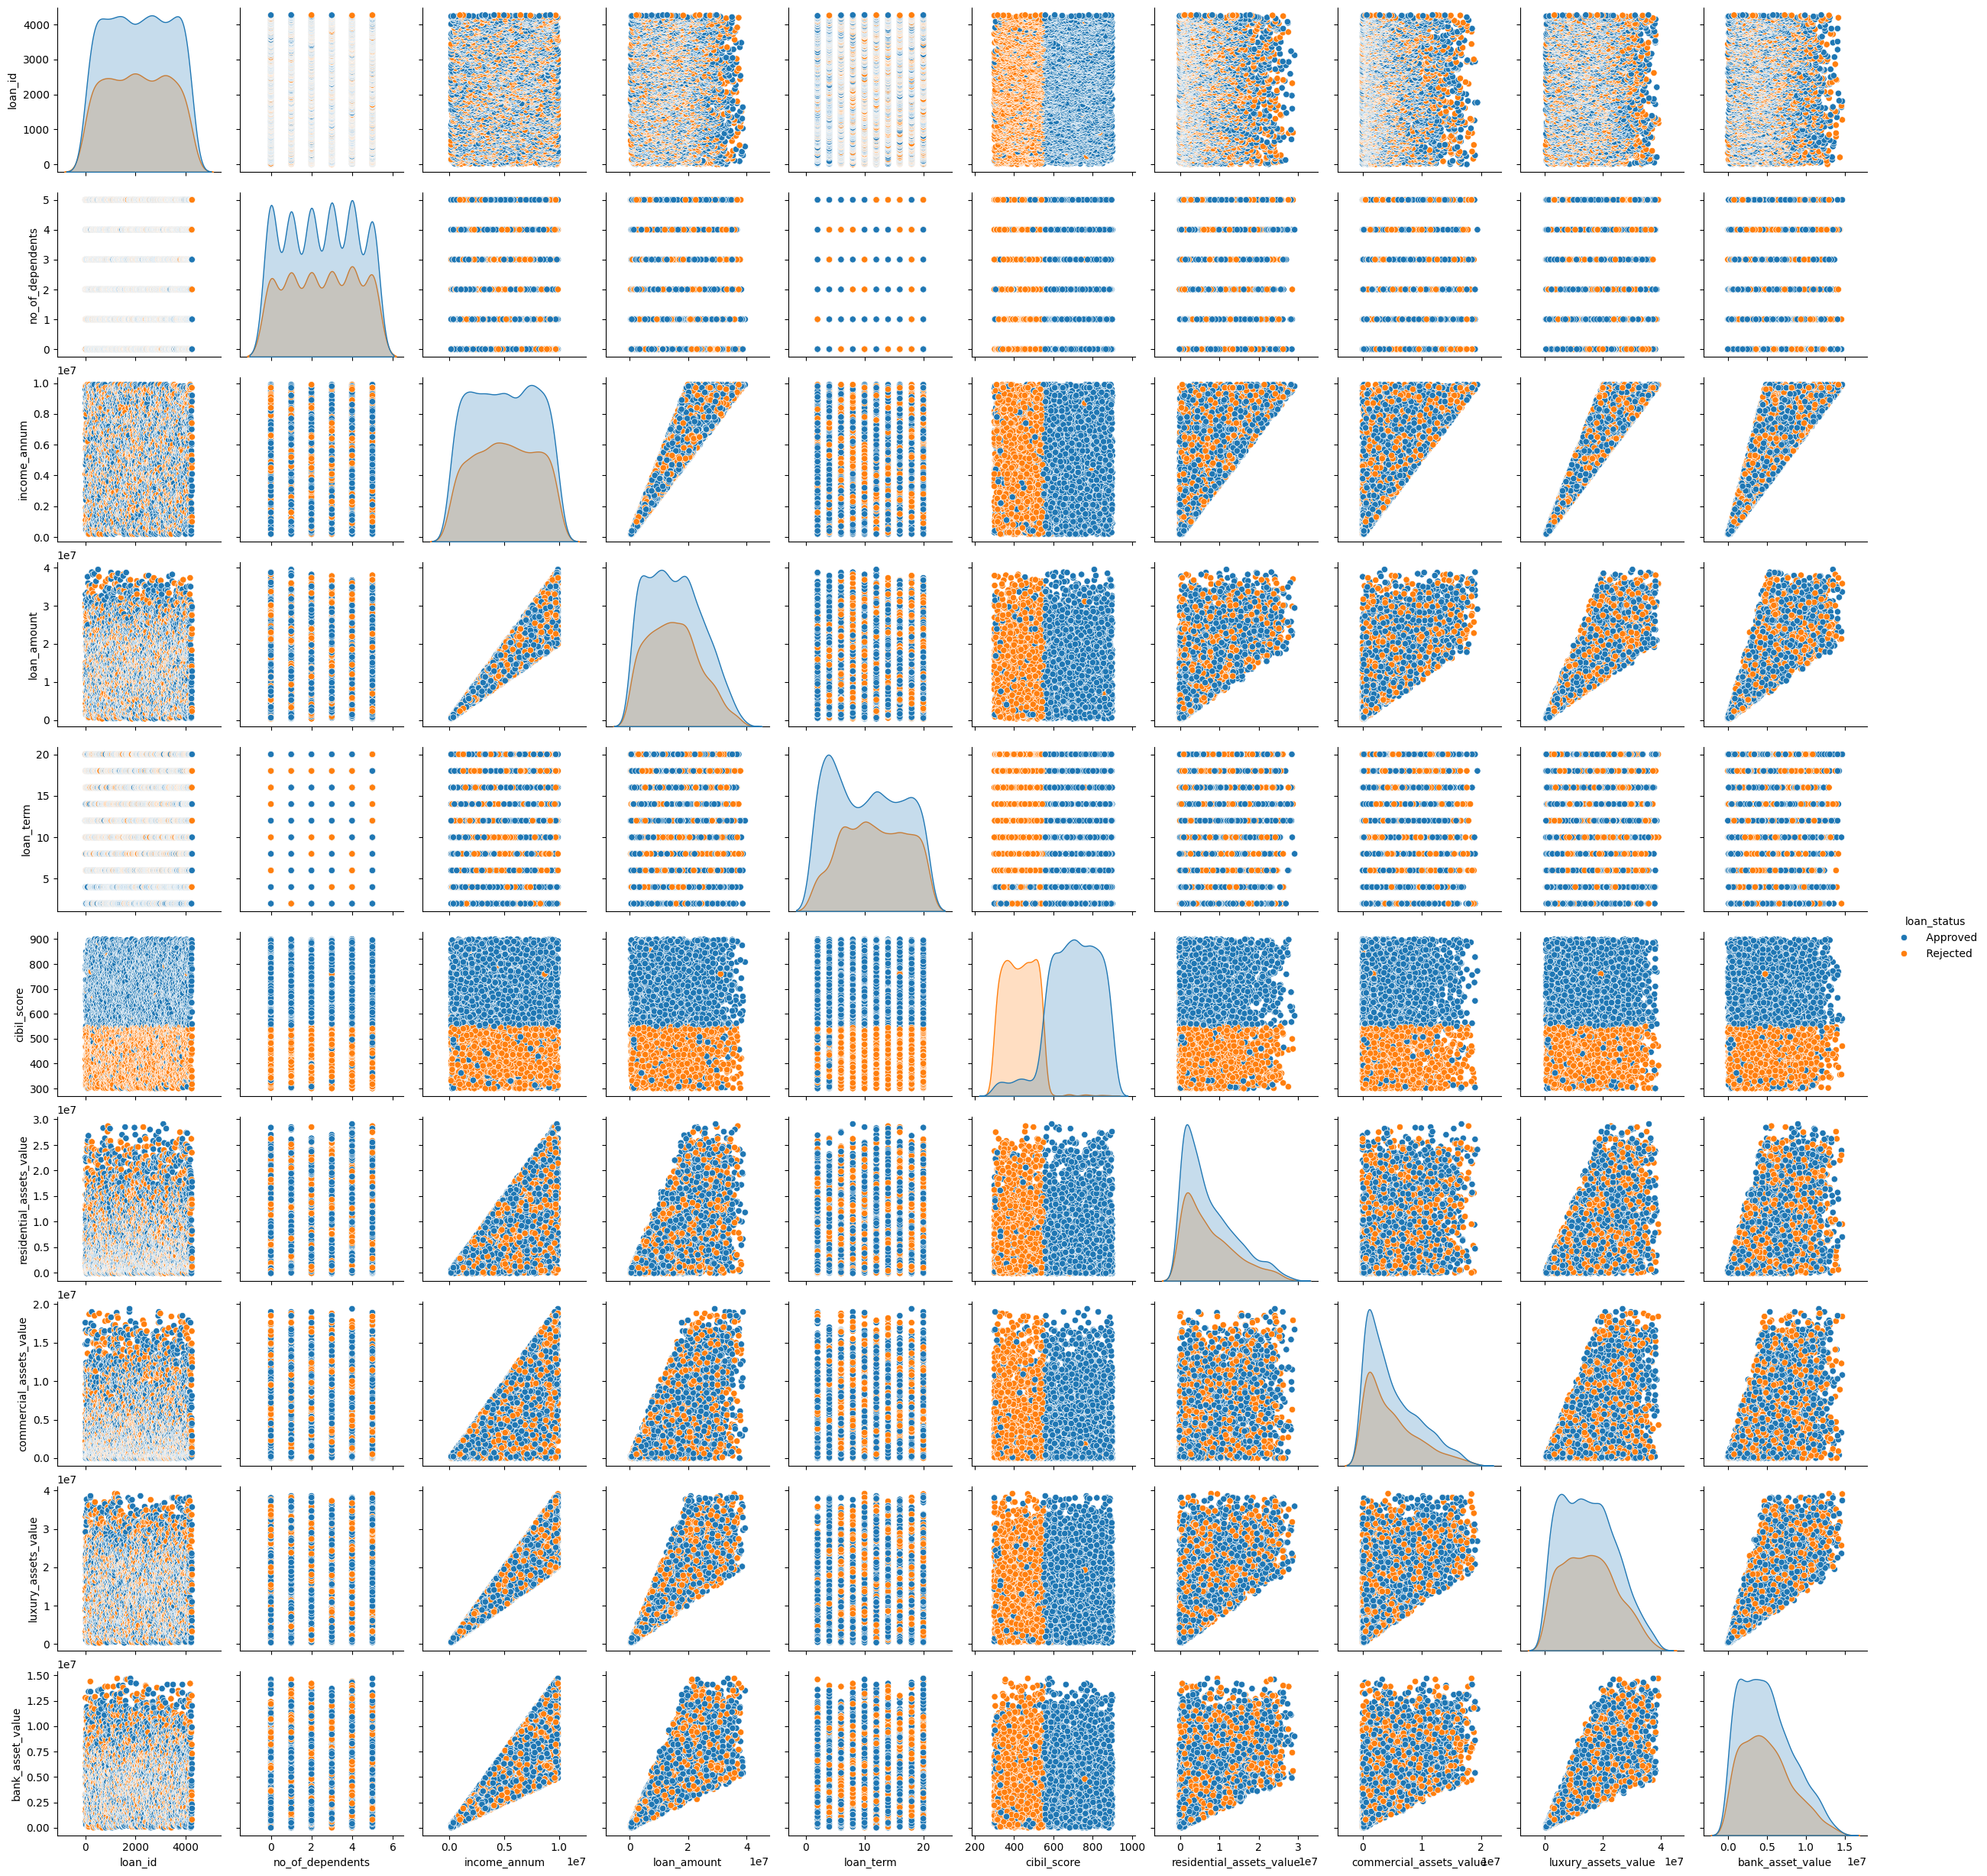

In [13]:
# Create a pair plot for numerical columns
sns.pairplot(loan, hue='loan_status', diag_kind='kde')


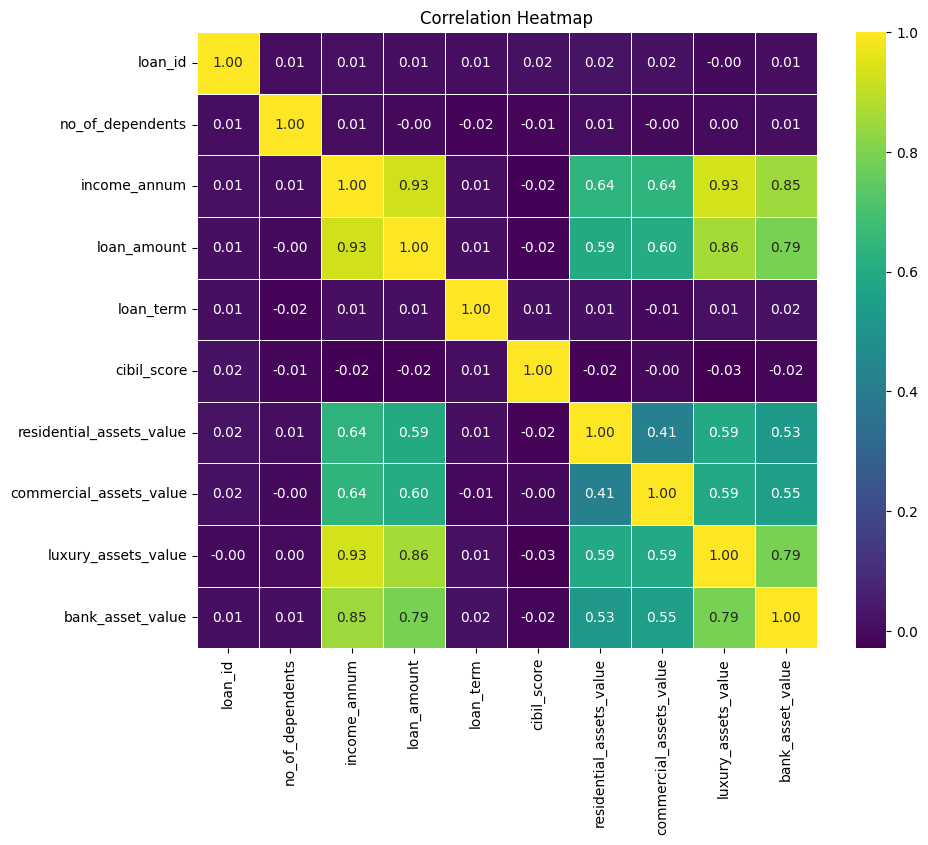

In [14]:
# Extract numerical columns for correlation
numerical_columns = loan.select_dtypes(include=['int64']).columns

# Calculate the correlation matrix
correlation_matrix = loan[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

As we can see, there are some variables having positive correlation with other variables, for example loan_amount & income_annum, luxury_assets_value & bank_asset_value, income_annum & luxury_assets_value, loan_amount & luxury_assets_value, income_annum & bank_asset_value.


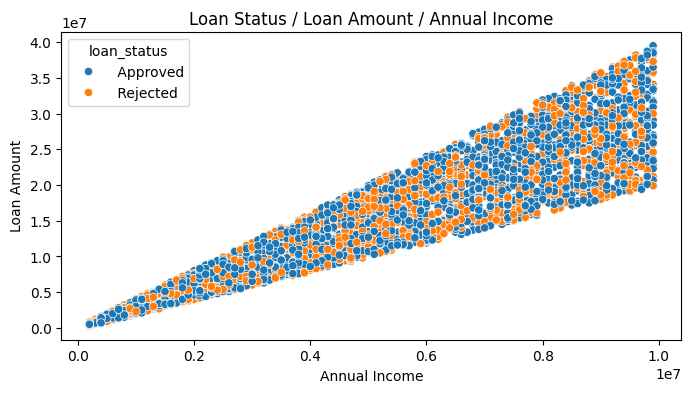

In [15]:
# Create a scatter plot of loan_amount & income_annum
plt.figure(figsize=(8, 4))
sns.scatterplot(x='income_annum', y='loan_amount', hue='loan_status', data=loan)
plt.title("Loan Status / Loan Amount / Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

From the above figurew, when annual income increases, the loan amount tends to increase. But the annual income doesn't show an obvious trend with the loan status.

* The applicants who have the lower annual income have a narrow range in loan amounts. Also, the applicants who have the higher annual income have a wider range in the loan amounts. Besides, the lenders will only accept the loan amount that aligns with the annual income in order to make sure the applicants have the ability to pay back the loan, i.e,the applicants who have higher annual income have more flexibility on the amount of the loan.

* The applicants who has highest annual income has been approved when they apply for the highest loan amount (see the upper right corner of the figure), but at the same time, the applicants who have the highest annual income have chances of being rejected when they apply lower loan amount (see the middle right of the figure/lower right of the triangle). 


In [16]:
#lets check how many higher annual incomes got rejected
loan.loc[(loan['income_annum'] == loan['income_annum'].max()) & (loan['loan_status'] ==' Rejected')]

loan_id  no_of_dependents      education self_employed  income_annum  \
82         83                 2   Not Graduate           Yes       9900000   
157       158                 5   Not Graduate           Yes       9900000   
1179     1180                 5       Graduate            No       9900000   
1272     1273                 5   Not Graduate            No       9900000   
1409     1410                 3       Graduate           Yes       9900000   
1547     1548                 1       Graduate           Yes       9900000   
1890     1891                 5       Graduate            No       9900000   
2862     2863                 4       Graduate            No       9900000   
2869     2870                 4       Graduate            No       9900000   
3000     3001                 1   Not Graduate           Yes       9900000   
3548     3549                 2   Not Graduate            No       9900000   
4191     4192                 2       Graduate           Yes       9900000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
82       21200000         16          363                  25500000   
157      33300000          6          364                   5300000   
1179     35700000         10          392                   7900000   
1272     35800000         20          470                   9500000   
1409     29900000         20          490                  10500000   
1547     34100000         14          371                  24400000   
1890     24600000          2          530                  24200000   
2862     30000000         18          496                  10400000   
2869     26100000          2          481                  14500000   
3000     25700000          2          340                  15600000   
3548     19900000          6          312                  21400000   
4191     37300000          8          385                    600000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
82                   11400000             26600000           6800000   
157                  18700000             27800000           8300000   
1179                  4300000             39200000          13000000   
1272                 18400000             39100000          14700000   
1409                  9100000             27100000           7400000   
1547                  7100000             29300000           6200000   
1890                 12800000             20400000          13000000   
2862                  8000000             29300000          13800000   
2869                  5000000             23600000           9300000   
3000                 18800000             29500000          11800000   
3548                  2200000             31400000          11000000   
4191                   900000             27400000          14200000   

     loan_status  
82      Rejected  
157     Rejected  
1179    Rejected  
1272    Rejected  
1409    Rejected  
1547    Rejected  
1890    Rejected  
2862    Rejected  
2869    Rejected  
3000    Rejected  
3548    Rejected  
4191    Rejected

<p>In the previous section, we have noticed that applicants who have the highest annual income tried to apply for a lower loan amount, but were rejected by the lenders. By checking up the above subset, we can confirm that the loan amount is not the main reason that causes their applications to be rejected. Taking a closer look at this subset, their credit scores (cibil_score) are considered as "Poor".
According to Equifax, the standard of the credit scores are: 300-579: Poor. 580-669: Fair. 670-739: Good. 740-799: Very good.</p>

Let's check on Credit score:

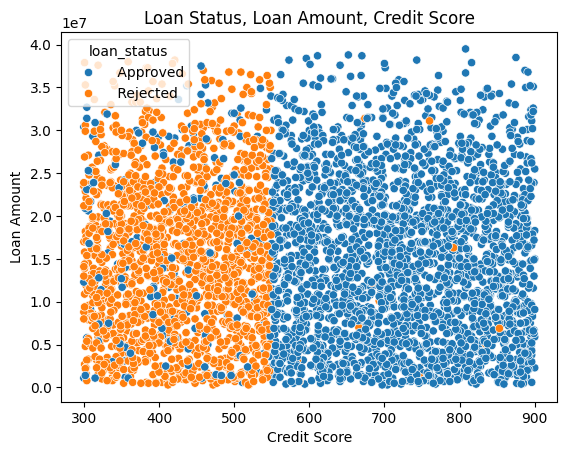

In [17]:
sns.scatterplot(x=loan['cibil_score'], y= loan['loan_amount'], hue=loan['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

We can see that the loan status is highly related to the credit score.t is also interesting to see the credit score that separates the loan status is not 579 which is the highest score of the "poor" credit score. In the other words, the poor credit scores which are above 540 - 550 still have a good chance of being approved by loan lenders. This could be attributed to lenders' flexibility or specific factors that impact approval decisions. Also, few of them above 740 is rejected.

#### luxury_assets_value, bank_asset_value, residential_assets_value, commercial_assets_value


* Luxury Assets Value: This might refer to the total value of high-end or luxury items owned by the individuals or organizations. These could include items such as luxury vehicles, valuable artwork, jewelry, and other premium possessions.

* Bank Asset Value: This is possibly the total value of assets held by the bank or lending institution itself. It might include cash reserves, investments, and other financial assets.

* Residential Assets Value: This is likely a measure of the total value of residential properties or real estate assets owned by the individuals or organizations in the dataset.

* Commercial Assets Value: This could represent the total value of commercial properties or business-related assets owned by the individuals or organizations in the dataset. Commercial properties might include office buildings, retail spaces, warehouses, and similar assets.



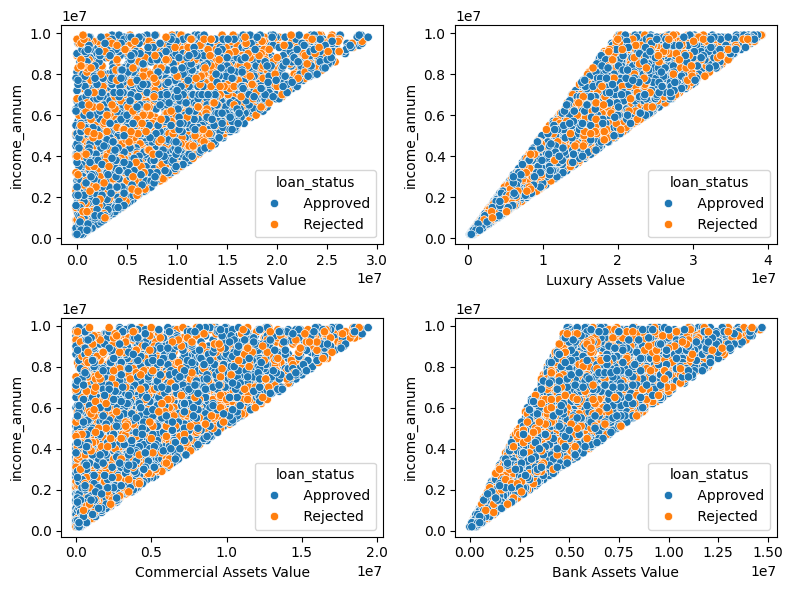

In [18]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.scatterplot(loan, x = 'luxury_assets_value', y= 'income_annum', hue = 'loan_status',ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")

sns.scatterplot(loan, x = 'bank_asset_value', y= 'income_annum', hue = 'loan_status',ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")

sns.scatterplot(loan, x = 'residential_assets_value', y= 'income_annum', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")

sns.scatterplot(loan, x = 'commercial_assets_value', y= 'income_annum', hue = 'loan_status',ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")


plt.tight_layout()
plt.show()


<p>luxury_assets_value, bank_asset_value have a different type of relationship. The smaller triangle for luxury assets value compared to bank asset value might indicate that while there's a strong correlation between luxury assets value and annual income, there's a higher variability in annual income for any given luxury assets value. In other words, luxury assets might be a good indicator of higher annual income, but there are exceptions.</p>

<p>Both of residential_assets_value, commercial_assets_value create right triangles on the scatter plots, cutting the plot into two sections. This indicates that the relationship between annual income and these asset values might have some sort of threshold effect. For example, once the asset value reaches a certain point, the annual income tends to increase significantly.
</p>

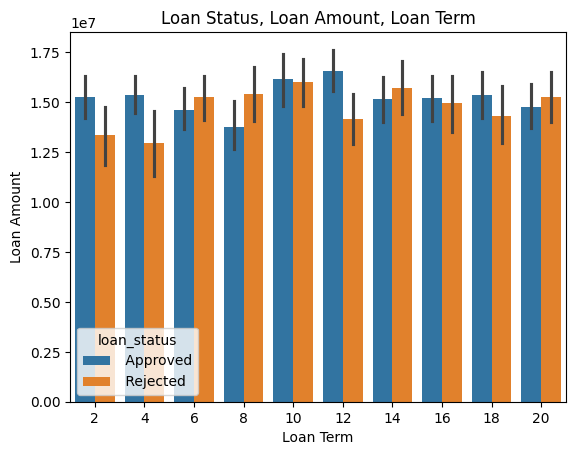

In [19]:
sns.barplot(x=loan['loan_term'], y= loan['loan_amount'], hue=loan['loan_status'])
plt.title("Loan Status, Loan Amount, Loan Term")
plt.xlabel("Loan Term")
plt.ylabel("Loan Amount")
plt.show()

* The shortest loan term in this dataset is 2 years, between 2-4 years gets the one of the most chances for being approved by the lenders, also in 12 years approval is more compared to other loan terms. When the loan term is in between 4-12 years, and after 12 yrs the chance of being rejected have significantly increased. Now lets check whether no.of dependents affect the loan status.

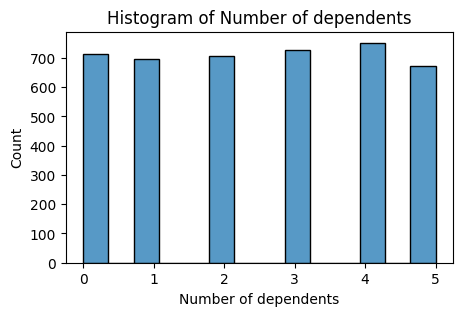

In [20]:
plt.figure(figsize = (5,3))
sns.histplot(loan['no_of_dependents'])
plt.xlabel("Number of dependents")
plt.title("Histogram of Number of dependents")

plt.show()

In [21]:
pd.crosstab(index=loan['no_of_dependents'], columns=loan['loan_status'])

loan_status        Approved   Rejected
no_of_dependents                      
0                       457        255
1                       430        267
2                       441        267
3                       457        270
4                       465        287
5                       406        267

we cannot come to a conclusion from these data. Now lets check education:

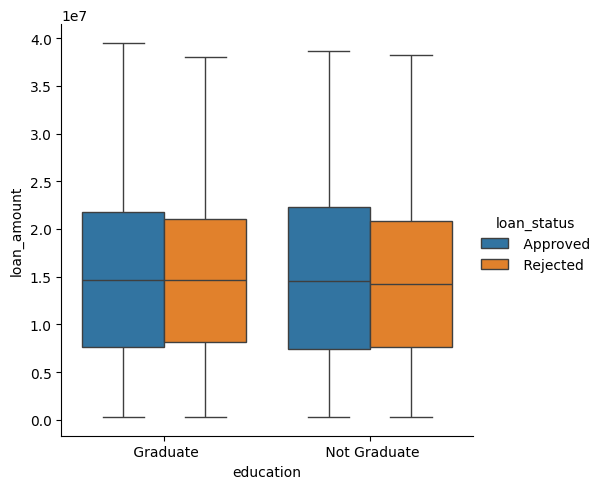

In [22]:
# Create a categorical plot using 'hue' for color representation
sns.catplot(x='education', y='loan_amount', hue='loan_status', data=loan, kind='box')

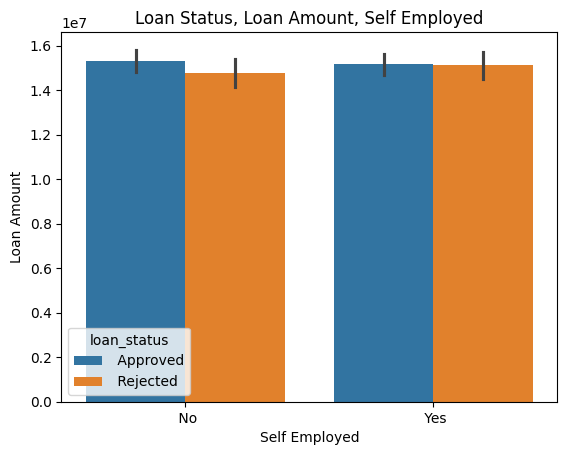

In [23]:
sns.barplot(x=loan['self_employed'], y= loan['loan_amount'], hue=loan['loan_status'])
plt.title("Loan Status, Loan Amount, Self Employed")
plt.xlabel("Self Employed")
plt.ylabel("Loan Amount")
plt.show()

There are no significant differences between the self_employed and loan status/amount like education, self_employed

#### Summary

<p><div style="text-align: justify;">So we can say that the feartures cibil_score (credit score), loan_term , loan _amount, income annum, will help to predict the loan status. We can also infer from these EDA that all other features like residential assets value, luxury_assets_value, bank asset value, commercial assets_value, no_of_dependents, self_employed and education has least importance in predicting loan status because we saw that these features has no much influence in loan status. Also, credit score has a great influence in loan approval.</p
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           >